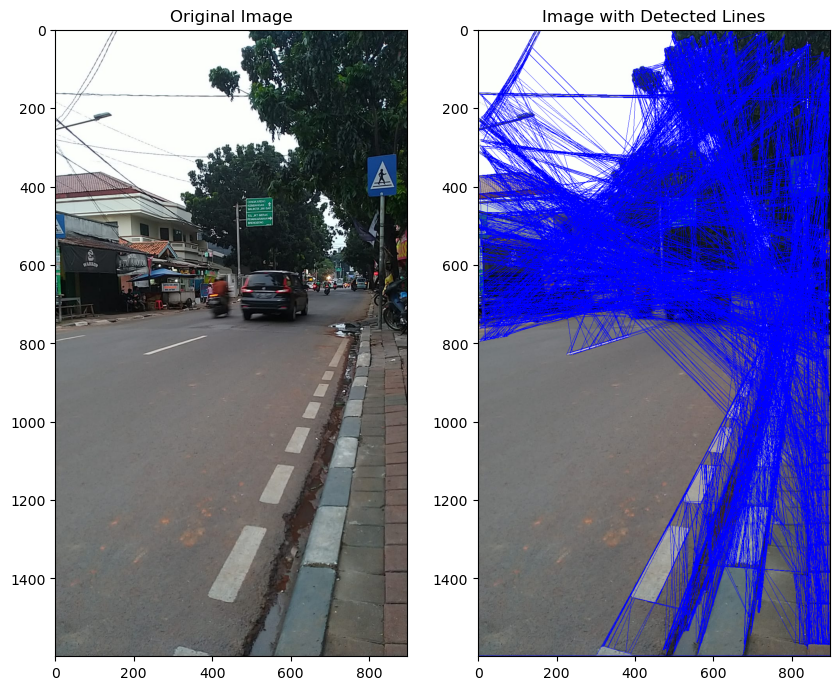

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform, draw

# Load the image
image = io.imread('street.jpeg')

# Convert the image to grayscale
gray = color.rgb2gray(image)

# Detect edges using Canny edge detection
edges = feature.canny(gray, sigma=2)

# Perform Hough Transform to detect lines
lines = transform.probabilistic_hough_line(edges, threshold=30, line_gap=250)

# Create a copy of the original image to draw lines on
image_with_lines = np.copy(image)

# Draw the detected lines on the image
for line in lines:
    p0, p1 = line
    x0, y0 = p0
    x1, y1 = p1
    rr, cc = draw.line(y0, x0, y1, x1)
    image_with_lines[rr, cc] = (0, 0, 255)

# Display the original image and the image with detected lines
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(image_with_lines, cmap='gray')
axs[1].set_title('Image with Detected Lines')
plt.show()
